In [1]:
import pickle, os
from itertools import islice
import numpy as np, scipy as sp, pandas as pd
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 40)
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcdefaults()
if hasattr(__builtins__, '__IPYTHON__'):
    get_ipython().run_line_magic('matplotlib', 'inline')
    get_ipython().run_line_magic('config', 'InlineBackend.figure_format = "jpg"')
    get_ipython().run_line_magic('load_ext', 'autoreload')
    get_ipython().run_line_magic('autoreload', '2')
    # https://stackoverflow.com/questions/70766518/how-to-change-ipython-error-highlighting-color
    from IPython.core import ultratb
    print(ultratb.VerboseTB._tb_highlight)
    ultratb.VerboseTB._tb_highlight = "bg:#006400"

bg:ansiyellow


In [2]:
%run util.ipynb

bg:#006400


In [3]:
# https://data.gov.tw/dataset/35430
# https://bus194625.pixnet.net/blog/post/166678782
# dns = [dn for dn in os.listdir('data_taiwan') if not dn.startswith('.')]
dns = [
    'taoyuan_city', 'taipei_city', 'new_taipei_city', 
    'yilan_county', 'keelung_city', 'hsinchu_county', 'hsinchu_city',
]
fnss = {dn: os.listdir(os.path.join('data_taiwan', dn)) for dn in dns}
dfs = {
    (dn, fn): pd.read_csv(os.path.join('data_taiwan', dn, fn), names=['x20', 'y20', 'z'], sep=' ')
for dn, fns in fnss.items()
    for fn in fns if fn.endswith('.grd')
}

In [4]:
df = pd.concat([v for k, v in dfs.items() if k[0] not in []])
del dfs
df.shape

(25275350, 3)

In [5]:
df.head(20)

,x20,y20,z
0,255820,2757240,94.42
1,255840,2757240,94.91
2,255860,2757240,94.48
3,255880,2757240,95.21
4,255900,2757240,96.73
5,255920,2757240,96.91
6,255940,2757240,97.27
7,255960,2757240,97.52
8,255980,2757240,97.39
9,256000,2757240,97.39


In [6]:
df.describe()

,x20,y20,z
count,2.527535e+07,2.527535e+07,2.527535e+07
mean,2.967500e+05,2.744719e+06,5.721792e+02
std,2.557412e+04,2.581758e+04,6.581520e+02
min,2.356000e+05,2.688140e+06,-9.990000e+02
25%,2.783000e+05,2.724460e+06,7.642000e+01
50%,2.987000e+05,2.745800e+06,2.950000e+02
75%,3.168800e+05,2.765620e+06,8.872100e+02
max,3.518000e+05,2.801720e+06,3.739020e+03


In [7]:
df['z'][df['z'].between(-1., 1.)].value_counts().sort_index()

-0.89       141
-0.77       294
-0.71       398
-0.59       689
-0.53       345
-0.41      1278
-0.29      1269
-0.23      1564
-0.10      8690
-0.05         7
-0.03        28
-0.01     41407
 0.00    793326
 0.02    387529
 0.04     25313
 0.06       130
 0.08      2025
 0.09     13473
 0.11       184
 0.12         4
 0.13      4375
 0.14         6
 0.15       209
 0.18      4107
 0.19         3
 0.20      1590
 0.22      4596
 0.24       257
 0.26         2
 0.27      5167
 0.29       285
 0.31      5199
 0.32      1598
 0.33       332
 0.36      5346
 0.38      1681
 0.40      5472
 0.42       360
 0.44         2
 0.45      5231
 0.47       353
 0.49      5319
 0.50      1543
 0.51       400
 0.54      5121
 0.56       382
 0.57         1
 0.58      5314
 0.60       387
 0.62      1494
 0.63      5173
 0.65       406
 0.67      5396
 0.68      1118
 0.69       388
 0.70         1
 0.72      5616
 0.74       445
 0.76      5213
 0.78       436
 0.81      6844
 0.83       416
 0.85   

In [8]:
z_min = .03
df.loc[df['z'] < .03, 'z'] = .03

In [9]:
df['x'] = x20_2_x(df['x20'])
df['y'] = y20_2_y(df['y20'])
df.drop(['x20', 'y20'], axis='columns', inplace=True)

In [10]:
df_truncated = df[df['x'].between(x_min, x_max, inclusive='left') & df['y'].between(y_min, y_max, inclusive='left')]
del df

In [11]:
mat = np.full((y_max, x_max), z_min, dtype=np.float64)
mat[df_truncated['y'], df_truncated['x']] = df_truncated['z']
del df_truncated

In [12]:
# np.save('data_taiwan/dem.npy', mat)

In [13]:
mat = np.load('data_taiwan/dem.npy')

In [14]:
mat.nbytes

130216320

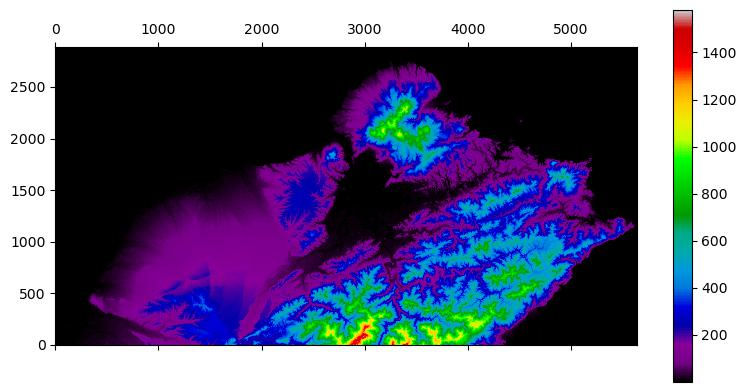

In [15]:
plt.matshow(mat, origin='lower', cmap='nipy_spectral');
plt.gca().set_aspect('equal');
plt.colorbar();